# Argo / GO-SHIP Comparison

Authors: Ratnaksha Lele, Hartmut Frenzel, Jon Sharp, Christopher Gordon, Myranda Uselton Shirk

In this Example notebook, metadata from a selected GO-SHIP cruise line is obtained, along with data from nearby Argo profiles that fall within user-provided time and space constraints from the GO-SHIP profiles. Those Argo profile data are converted to more user-friendly xarray format, then locations of GO-SHIP stations and Argo prrofiles are plotted.

## Imports, Constants

In [111]:
# data processing
import numpy as np
import pandas as pd
import xarray as xr
from time import sleep

# data visualization
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline

# API convenience functions
from utilities_NSF_EC2022 import get_data_for_timeRange

# geographic functions
import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import warnings
warnings.filterwarnings('ignore')

# set constants
URL_PREFIX = 'https://argovis-api.colorado.edu'
API_KEY = '55f5453f2be58f8a6e8da6c9ea9a737225cc65c3'

## Task 1: Download data from GO-SHIP line, ang get data from surrounding Argo profiles
The function *get_goship_line* provides metadata for a specified GO-SHIP line.

The function *get_argo_along_line* downloads data from Argo profiles that are within given time and space constraints from a given set of profiles (in this case the GO-SHIP metadata we downloaded in Task 1).

In [112]:
# more convenient wrapper for if you want a line just by name
def get_goship_line(line_name, startDate='2000-01-01T00:00:00Z', endDate='2022-05-01T00:00:00Z', dt_tag='365d', url=URL_PREFIX, api_key=API_KEY):
    df = get_data_for_timeRange(startDate, endDate, url_prefix=url+'/profiles?', 
                                source='cchdo_go-ship', woceline=line_name, 
                                myAPIkey=api_key, dt_tag=dt_tag)
    return df

# I think we should have a time independent version of this function as well
# could cheat this function into doing it with something like timedelta=1e5 or something
def get_argo_along_line(time, coords, radius=50, timedelta=30, dt_tag='365d', url=URL_PREFIX, api_key=API_KEY):
    df_all = pd.DataFrame()
    for t, c in zip(time, coords):
        sleep(.2)
        startDate = (pd.Timestamp(t) - pd.Timedelta(timedelta/2)).strftime('%Y-%m-%dT%H:%M:%SZ')
        endDate   = (pd.Timestamp(t) + pd.Timedelta(timedelta/2)).strftime('%Y-%m-%dT%H:%M:%SZ')
        center    = f'{c[0]},{c[1]}'
        df = get_data_for_timeRange(startDate, endDate, url_prefix=url+'/profiles?',
            center=center, radius_km=f'{radius}', source='argo_core', data='pres,temp,psal',
            myAPIkey=api_key, dt_tag=dt_tag, writeFlag=False)
        df_all = df_all.append(df)
    
    return df_all

# get argo data along line A22
a22 = get_goship_line('A22')
coords = [c['coordinates'] for c in a22.geolocation]
time = a22.timestamp.values
argo_a22 = get_argo_along_line(time, coords)

In [113]:
argo_a22

,_id,cycle_number,basin,data_type,geolocation,instrument,timestamp,date_updated_argovis,fleetmonitoring,oceanops,...,geolocation_argoqc,timestamp_argoqc,platform_type,positioning_system,vertical_sampling_scheme,wmo_inst_type,source_info,data_keys,data_keys_mode,data
0,4903349_000,0,1,oceanicProfile,"{'type': 'Point', 'coordinates': [-69.70484, 1...",profiling_float,2021-04-24T08:41:23.000Z,2022-04-03T10:11:00.709Z,https://fleetmonitoring.euro-argo.eu/float/490...,https://www.ocean-ops.org/board/wa/Platform?re...,...,1,1,S2A,GPS,Primary sampling: averaged [nominal 2 dbar bin...,854,"[{'source': ['argo_core'], 'source_url': 'ftp:...","[pres, psal, temp]","{'pres': 'R', 'temp': 'R', 'psal': 'R'}","[{'pres': 1.04, 'psal': 35.91, 'temp': 27.2800..."
1,4903349_001,1,1,oceanicProfile,"{'type': 'Point', 'coordinates': [-69.72383, 1...",profiling_float,2021-04-24T19:26:59.002Z,2022-04-03T10:11:01.842Z,https://fleetmonitoring.euro-argo.eu/float/490...,https://www.ocean-ops.org/board/wa/Platform?re...,...,1,1,S2A,GPS,Primary sampling: averaged [nominal 2 dbar bin...,854,"[{'source': ['argo_core'], 'source_url': 'ftp:...","[pres, psal, temp]","{'pres': 'R', 'temp': 'R', 'psal': 'R'}","[{'pres': 0.96, 'psal': 35.917999, 'temp': 27...."
0,4903351_000,0,1,oceanicProfile,"{'type': 'Point', 'coordinates': [-69.51593, 1...",profiling_float,2021-04-24T21:08:36.002Z,2022-03-30T16:31:27.423Z,https://fleetmonitoring.euro-argo.eu/float/490...,https://www.ocean-ops.org/board/wa/Platform?re...,...,1,1,S2A,GPS,Primary sampling: averaged [nominal 2 dbar bin...,854,"[{'source': ['argo_core'], 'source_url': 'ftp:...","[pres, psal, temp]","{'pres': 'R', 'temp': 'R', 'psal': 'R'}","[{'pres': 1, 'psal': 35.880001, 'temp': 27.365..."
0,4903350_000,0,1,oceanicProfile,"{'type': 'Point', 'coordinates': [-66.4687, 17...",profiling_float,2021-04-26T17:02:41.001Z,2022-03-29T10:49:36.378Z,https://fleetmonitoring.euro-argo.eu/float/490...,https://www.ocean-ops.org/board/wa/Platform?re...,...,1,1,S2A,GPS,Primary sampling: averaged [nominal 2 dbar bin...,854,"[{'source': ['argo_core'], 'source_url': 'ftp:...","[pres, psal, temp]","{'pres': 'R', 'temp': 'R', 'psal': 'R'}","[{'pres': 1, 'psal': 35.839001, 'temp': 27.216..."
0,4903347_000,0,1,oceanicProfile,"{'type': 'Point', 'coordinates': [-65.99841, 1...",profiling_float,2021-04-30T19:51:31.002Z,2022-03-29T02:39:24.582Z,https://fleetmonitoring.euro-argo.eu/float/490...,https://www.ocean-ops.org/board/wa/Platform?re...,...,1,1,S2A,GPS,Primary sampling: averaged [nominal 2 dbar bin...,854,"[{'source': ['argo_core'], 'source_url': 'ftp:...","[pres, psal, temp]","{'pres': 'R', 'temp': 'R', 'psal': 'R'}","[{'pres': 0.48, 'psal': 36.688999, 'temp': 26...."
0,4903347_000,0,1,oceanicProfile,"{'type': 'Point', 'coordinates': [-65.99841, 1...",profiling_float,2021-04-30T19:51:31.002Z,2022-03-29T02:39:24.582Z,https://fleetmonitoring.euro-argo.eu/float/490...,https://www.ocean-ops.org/board/wa/Platform?re...,...,1,1,S2A,GPS,Primary sampling: averaged [nominal 2 dbar bin...,854,"[{'source': ['argo_core'], 'source_url': 'ftp:...","[pres, psal, temp]","{'pres': 'R', 'temp': 'R', 'psal': 'R'}","[{'pres': 0.48, 'psal': 36.688999, 'temp': 26...."
0,4903345_000,0,1,oceanicProfile,"{'type': 'Point', 'coordinates': [-65.92256, 2...",profiling_float,2021-05-02T09:01:03.000Z,2022-04-02T23:05:41.029Z,https://fleetmonitoring.euro-argo.eu/float/490...,https://www.ocean-ops.org/board/wa/Platform?re...,...,1,1,S2A,GPS,Primary sampling: averaged [nominal 2 dbar bin...,854,"[{'source': ['argo_core'], 'source_url': 'ftp:...","[pres, psal, temp]","{'pres': 'R', 'temp': 'R', 'psal': 'R'}","[{'pres': 1, 'psal': 36.408001, 'temp': 26.562..."
1,4903345_001,1,1,oceanicProfile,"{'type': 'Point', 'coordinates': [-65.91212, 2...",profiling_float,2021-05-02T19:46:44.002Z,2022-04-02T23:05:44.489Z,https://fleetmonitoring.euro-argo.eu/float/490...,https://www.ocean-ops.org/board/wa/Platform?re...,...,1,1,S2A,GPS,Primary sampling: averaged [nominal 2 dbar bin...,

## Task 3: Convert data to xarray
The function *json_dataframe_to_dataframe* converts data downloaded in prior tasks in json format to a format ready for conversion to an xarray. The function *dataframe_to_xarray* converts the processed json data to xarray format.

In [114]:
# process data from full of JSON points to more usable form
def json_dataframe_to_dataframe(df):
    out = pd.DataFrame()
    for i in range(df.shape[0]):
        # get the argo data
        data_dict = dict()
        data = df.data.iloc[i]
        # repeat location and time data for same lenth as array
        N_levels = len(data)
        data_dict['wmo'] = N_levels*[int(df._id.iloc[i].split('_')[0])]
        data_dict['cycle_number'] = N_levels*[df.cycle_number.iloc[i]]
        data_dict['time'] = N_levels*[df.timestamp.iloc[i]]
        data_dict['longitude'] = N_levels*[df.geolocation.iloc[i]['coordinates'][0]]
        data_dict['latitude'] = N_levels*[df.geolocation.iloc[i]['coordinates'][1]]
        # extract data from JSON dict
        for k in df.data_keys.iloc[i]:
            data_dict[k] = [d[k] for d in data]

        out = pd.concat((out, pd.DataFrame(data_dict, index=(i+1)*np.ones((N_levels,), dtype=int))))
    
    return out

df = json_dataframe_to_dataframe(argo_a22)

def dataframe_to_xarray(df):
    # get max number of depth levels
    ix = df.index.unique()
    number_profiles = ix.shape[0]
    max_levels = -np.inf
    for nprof in ix:
        if df.loc[nprof].shape[0] > max_levels:
            max_levels = df.loc[nprof].shape[0]

    # extract lower dimension metadata
    metadata = ['wmo', 'cycle_number', 'time', 'longitude', 'latitude']
    meta_dict = dict()
    for k in metadata:
        meta_dict[k] = [df[k].loc[i].iloc[0] for i in ix]
    df = df.drop(metadata, axis=1)
    data_dict = {k:np.nan*np.ones((number_profiles, max_levels)) for k in df.columns}

    # put argo data into "square" arrays
    for nprof in ix:
        profile = df.loc[nprof]
        current_depth_levels = profile.shape[0]
        for k in profile.columns:
            data_dict[k][nprof-1,:current_depth_levels] = profile[k]
    

    # create xarray dataset
    ds = xr.Dataset(
        data_vars = {k:(['n_prof', 'n_level'], v) for k, v in data_dict.items()},
        coords = {k:(['n_prof'], v) for k, v in meta_dict.items()}
    )
    # transpose for simpler plotting
    ds = ds.transpose('n_level', 'n_prof')

    return ds

ds = dataframe_to_xarray(df)
ds

<xarray.Dataset>
Dimensions:       (n_prof: 13, n_level: 557)
Coordinates:
    wmo           (n_prof) int64 4903349 4903349 4903351 ... 4903346 5906438
    cycle_number  (n_prof) int64 0 1 0 0 0 0 0 1 0 1 0 1 1
    time          (n_prof) <U24 '2021-04-24T08:41:23.000Z' ... '2021-05-10T18...
    longitude     (n_prof) float64 -69.7 -69.72 -69.52 ... -65.6 -65.63 -66.82
    latitude      (n_prof) float64 14.15 14.17 15.2 17.08 ... 26.82 26.83 34.85
Dimensions without coordinates: n_prof, n_level
Data variables:
    pres          (n_level, n_prof) float64 1.04 0.96 1.0 ... nan nan 1.9e+03
    psal          (n_level, n_prof) float64 35.91 35.92 35.88 ... nan nan 35.0
    temp          (n_level, n_prof) float64 27.28 27.41 27.36 ... nan nan 4.178

## Task 4: Plot locations of GO-SHIP and Argo data
The function *create_map* plots the locations of Argo and GO-SHIP profiles on a map

In [115]:
# mapping function
def create_map(coords, line_name):
    # figure out appropriate extent
    coords = np.array(coords)
    line_limits = [
        [np.min(coords[:,0]), np.max(coords[:,0])],
        [np.min(coords[:,1]), np.max(coords[:,1])]
    ]

    # set up map
    fig = plt.figure()
    projection = ccrs.PlateCarree()
    transform = ccrs.PlateCarree()
    ax = fig.add_subplot(projection=projection)
    ax.set_extent([line_limits[0][0]-5, line_limits[0][1]+5, line_limits[1][0]-2, line_limits[1][1]+2])
    ax.add_feature(cft.GSHHSFeature('intermediate', edgecolor='black'))
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    gl = ax.gridlines(crs=transform, draw_labels=True)
    gl.right_labels = False
    gl.xformatter = lon_formatter
    gl.yformatter = lat_formatter

    # plot go-ship line coordinates
    ax.plot(coords[:,0], coords[:,1], 'ko', transform=transform, label=line_name)
    # plot Argo coordinates
    ax.plot(ds.longitude, ds.latitude, 'o', color='red', transform=transform, label='Core Argo Profiles')

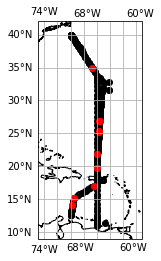

In [116]:
# Draw map with function
create_map(coords, "GO-SHIP Line A22")

In [117]:
# Wrapping everything up into one function
def argo_and_goship(goship_line_name, show_map = True, startDate='2000-01-01T00:00:00Z', endDate='2022-05-01T00:00:00Z', dt_tag='365d', radius=50, timedelta=30, url=URL_PREFIX, api_key=API_KEY):
    try:
        goship_line = get_goship_line(goship_line_name)
        coords = [c['coordinates'] for c in goship_line.geolocation]
        time = goship_line.timestamp.values
        argo = get_argo_along_line(time, coords)
        
        df = json_dataframe_to_dataframe(argo)
        ds = dataframe_to_xarray(df)
        
        if show_map == True:
            create_map(coords, goship_line_name)
    
    except:
        print("Invalid line. Please try again.")
    

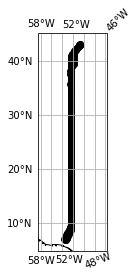

In [120]:
argo_and_goship('A20')

## Task 5: Interpolate data to regular depth levels

The function *interp_xarray* interpolates the Argo data on to regular depth levels defined by the user. This would allow similarly interpolated GO-SHIP data to be directly compared. 

In [119]:
def interp_xarray(ds, pressure_range):
    meta_dict = {k:ds[k].data for k in ds.coords}
    interp_dict = {k:np.nan*np.ones((ds.dims['n_prof'], pressure_range.shape[0])) for k in ds.keys() if k != 'pres'}
    for i in ds.keys():
        if i!= 'pres':
            for j in range(ds.dims['n_prof']):
                interp_dict[i][j,:] = np.interp(pressure_range, ds.pres[:,j], ds[i][:,j])

    # create xarray dataset
    coords_dict = {k:(['n_prof'], v) for k,v in meta_dict.items()}
    coords_dict['pres'] = (['n_level'], pressure_range)

    ds = xr.Dataset(
        data_vars = {k:(['n_prof', 'n_level'], v) for k,v in interp_dict.items()},
        coords =  coords_dict
    )

    # transpose dims for easier plotting
    ds = ds.transpose('n_level','n_prof')

    return ds

ids = interp_xarray(ds, np.arange(0, 2020, 20))
ids

<xarray.Dataset>
Dimensions:       (n_prof: 13, n_level: 101)
Coordinates:
    wmo           (n_prof) int64 4903349 4903349 4903351 ... 4903346 5906438
    cycle_number  (n_prof) int64 0 1 0 0 0 0 0 1 0 1 0 1 1
    time          (n_prof) <U24 '2021-04-24T08:41:23.000Z' ... '2021-05-10T18...
    longitude     (n_prof) float64 -69.7 -69.72 -69.52 ... -65.6 -65.63 -66.82
    latitude      (n_prof) float64 14.15 14.17 15.2 17.08 ... 26.82 26.83 34.85
    pres          (n_level) int32 0 20 40 60 80 100 ... 1920 1940 1960 1980 2000
Dimensions without coordinates: n_prof, n_level
Data variables:
    psal          (n_level, n_prof) float64 35.91 35.92 35.88 ... nan nan 35.0
    temp          (n_level, n_prof) float64 27.28 27.41 27.36 ... nan nan 4.178